新型コロナウイルスの状況に影響を受けるバイオ・ヘルス株を統計的に分析します。

# 世界の製薬・医薬品会社

## 世界の製薬会社トップテン(売上高ベース2019年12月決算)

||会社|国籍|株価コード|
|:-:|:-:|:-:|:-:|
|1|ロッシュ|スイス|RHHBY|
|2|ファイザー|米国|PFE|
|3|ノバルティス|スイス|NVS|
|4|メルク|米国|MRK|
|5|GSK|英国|GSK|
|6|J&J|米国|JNJ|
|7|サノフィ―|フランス|SNY|
|8|アッヴィ|米国|ABBV|
|9|武田薬品工業|日本|TAK|
|10|ブリストル|米国|BMY|

参考：https://answers.ten-navi.com/pharmanews/18365/
その他参考：https://www.value.today/world-top-companies/health-care

まずは株価をダウンロードしてグラフにしてみましょう。最初に準備をします。

Python3を用いてデータをダウンロードするためには、jupyter notebookとpandas-datareaderがお勧めです。jupyter notebookのインストールについては[Python3ではじめるシステムトレード：Jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)を参考にしてください。ここにpandas-datareaderのインストールの説明もあります。また、[Yahoo Finance USから株価をダウンロードしてみた](https://qiita.com/innovation1005/items/5be026cf7e1d459e9562)を参考にしてください。


In [1]:
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader.data as web #データのダウンロードライブラリ
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
#import datetime
#a=datetime.datetime.now()

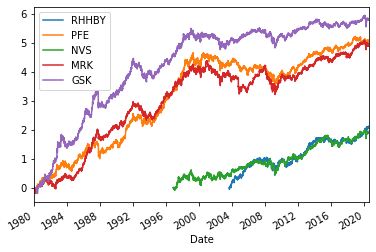

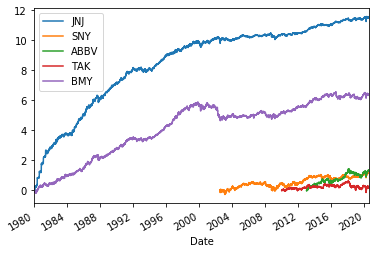

In [2]:
TOP10=['RHHBY','PFE','NVS','MRK','GSK','JNJ','SNY','ABBV','TAK','BMY']
i=1
for asset in TOP10:
    tsd = web.DataReader(asset,"yahoo",'1980/1/1').dropna()#jpy
    ts=tsd.loc[:,'Adj Close']/tsd.iloc[0,5]
    np.log(ts).plot(label=str(asset))
    if i==5:
        plt.legend()
        plt.show()
        i=0
    i+=1
if i!=1:
    plt.legend()
    plt.show()      

## バイオ・ヘルス関連EFT
米バイオ・ヘルスセクターの大まかな傾向をつかむために、それぞれの上場投資信託の価格の推移を見てみましょう。

### IBB

米国で有名なバイオ関連銘柄に投資するETF(上場投資信託)はIBBです。　

2015年のヒラリークリントンによる選挙活動の一旦としてバイオ株の収益性が問題になってから、下落基調にありましたが、コロナ禍で基調が変わりました。

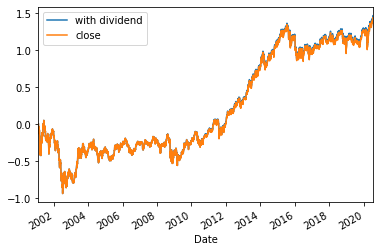

In [3]:
tsd = web.DataReader("ibb","yahoo","1990/1/4").dropna()#jpy
np.log(tsd.loc[:,'Adj Close']/tsd.iloc[0,5]).plot(label='with dividend')
np.log(tsd.loc[:,'Close']/tsd.iloc[0,3]).plot(label='close')
plt.legend()
ibb=tsd

### XLV

米国で有名なヘルスケア関連のETFはXLVです。

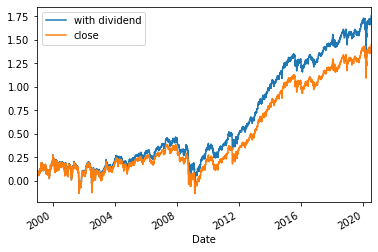

In [4]:
tsd = web.DataReader("xlv","yahoo","1990/1/4").dropna()#jpy
np.log(tsd.loc[:,'Adj Close']/tsd.iloc[0,5]).plot(label='with dividend')
np.log(tsd.loc[:,'Close']/tsd.iloc[0,3]).plot(label='close')
plt.legend()
xlv=tsd

青が配当込みの収益率なので配当の影響が理解できます。IBBとの大きな違いは青と橙の推移です。IBBでは配当が少ないですが、XLVではそれなりです。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/c60f9c20-05f2-3056-2a3a-0b81691335ba.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/5e9752be-c86f-ec85-fdd1-6f594251b486.png)
出所：https://www.ssga.com/jp/ja/individual/etfs/funds/us-the-health-care-select-sector-spdr-fund-xlv

# 長期投資の株価の見方

- なるべく長く保有する、10年―20年
- 損切は決してしない
- 利益が出るまで売却しない

## ディフェンシブ銘柄

景気動向に左右されにくい銘柄をディフェンシブ銘柄といいます。医薬品株は典型的なディフェンシブ銘柄です。その他に、生活必需品である食品や社会インフラである電力・ガス、鉄道、通信などの企業がディフェンス銘柄になります。

## 評価の仕方

長期投資の銘柄分析として配当を考慮することと金利水準を考慮することが大事です。また、価格の推移を可視化するときには[価格の対数を取る](https://qiita.com/innovation1005/items/5460a440b72c3c46375b)必要があります。

そこで[fred](https://qiita.com/innovation1005/items/edcf78cbf89477b3b0a7)から米国金利をダウンロードして、配当込みの株価を[us yahoo finance](https://qiita.com/innovation1005/items/5be026cf7e1d459e9562)からダウンロードします。

そして株価の配当込み利回りから金利を引くことで長期投資の目安とします。

### fredから1年金利のダウンロード
金利を可視化した後に、あとで使いやすいように250日でわって、1日のリターンに変換しておきます。


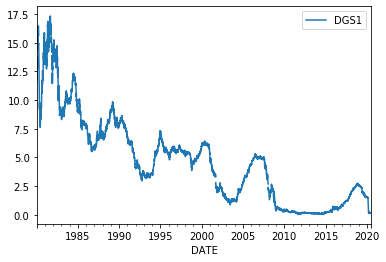

In [5]:
ror = web.DataReader("DGS1","fred","1980/1/4")#jpy
ror.plot()
ror = ror/250/100#jpy

### 可視化

つぎにIBBを可視化してみましょう。


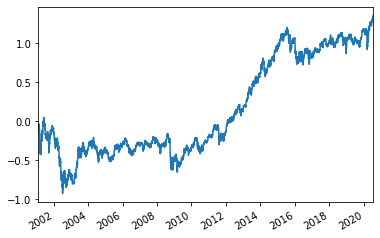

In [6]:
dtsd=ibb.pct_change()
tmp=pd.concat([dtsd.loc[:,'Adj Close'],ror],axis=1).dropna()
tmp['adj']=(1+tmp.iloc[:,0]/(1+tmp.iloc[:,1]))
tsda=tmp.iloc[:,2].cumprod()
ts=np.log(tsda)
ts.plot()

つぎにXLVについて可視化してみましょう。

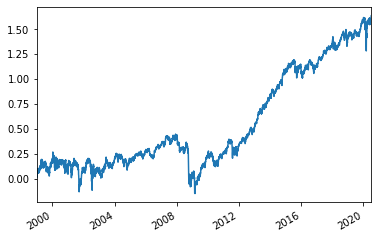

In [7]:
dtsd=xlv.pct_change()
tmp=pd.concat([dtsd.loc[:,'Adj Close'],ror],axis=1).dropna()
tmp['adj']=(1+tmp.iloc[:,0]/(1+tmp.iloc[:,1]))
tsda=tmp.iloc[:,2].cumprod()
ts=np.log(tsda)
ts.plot()

つぎにそれぞれのETFの構成銘柄の株価の推移を見てみましょう。

#### IBBのトップ10構成銘柄
つぎにコードは長期投資の分析のために、株価は金利で調整してあります。また、株価は対数を取っています。


GILD (0.8568728588950657, 11) (0.7067713562790569, 11) (0.9436470681905923, 11) (0.5057528854553689, 11)
VRTX (0.9020375736173658, 8) (0.8731377753751972, 8) (0.06244869955457663, 8) (0.16179187156610397, 8)
AMGN (0.9786249667251548, 9) (0.8815687815965167, 9) (0.3224098775184845, 9) (0.08536195534860375, 9)
BIIB (0.8309172162975775, 1) (0.1982725313410082, 1) (0.8016882654832087, 1) (0.08466707505500903, 0)
REGN (0.9689354233112949, 5) (0.21593934912011387, 5) (0.802592794954872, 5) (0.9683047597736468, 5)


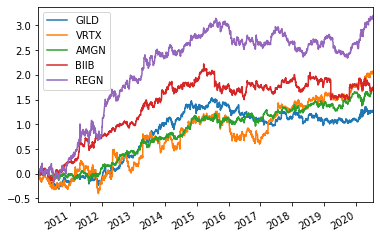

ILMN (0.9210138928798873, 21) (0.7346406634924141, 21) (0.34340608443623544, 21) (0.5587590590555903, 21)
SGEN (0.9716880675089898, 0) (0.8673263751236902, 0) (0.06992735245920172, 2) (0.2308452459988744, 2)
ALXN (0.8114038622922228, 1) (0.04933379047576686, 4) (0.6497602409176486, 4) (0.1250584679571281, 1)
INCY (0.8843422071345783, 4) (0.5536532299257728, 4) (0.7196214789528736, 4) (0.5405155547785945, 4)
MRNA (0.9719909318403522, 9) (0.9936159697521287, 9) (0.9878244819408282, 9) (0.5735482640156304, 9)


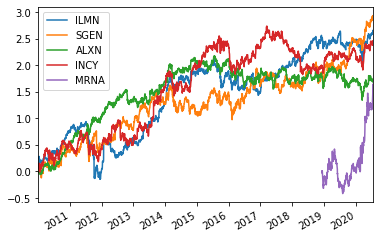

In [8]:
BIO10=['GILD','VRTX','AMGN','BIIB','REGN','ILMN','SGEN','ALXN','INCY','MRNA']

def LongtermInvest(PORT,ror,start):
    i=1
    for asset in PORT:
        tsd = web.DataReader(asset,"yahoo",start).dropna()#jpy
        dtsd=tsd.pct_change()
        tmp=pd.concat([dtsd.loc[:,'Adj Close'],ror],axis=1).dropna()
        tmp['adj']=(1+tmp.iloc[:,0]/(1+tmp.iloc[:,1]))
        tsda=tmp.iloc[:,2].cumprod()
        ts=np.log(tsda.dropna())
        ts.plot(label=str(asset))
        print(asset,adfuller((ts),regression='nc')[1:3],
            adfuller((ts),regression='c')[1:3],
            adfuller((ts),regression='ct')[1:3],
            adfuller((ts),regression='ctt')[1:3])
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()        
i=1
LongtermInvest(BIO10,ror,'2010/1/4')

#### XLVのトップ10銘柄

JNJ (0.9715356371961137, 16) (0.8757061536007185, 16) (0.11467059189605189, 16) (0.05430124037044614, 16)
UNH (0.9995082085500653, 14) (0.9020034600888384, 14) (0.04815728251597383, 14) (0.11593352885874425, 14)
MRK (0.9485106254743152, 16) (0.8840673101622796, 16) (0.07067753620557107, 16) (0.1322142809234218, 16)
PFE (0.9126598932334604, 25) (0.6033603485946003, 25) (0.5417642884011836, 25) (0.03338025718233877, 25)
ABBV (0.9186750668772401, 8) (0.40972092376518143, 8) (0.09928518728809665, 0) (0.2397648466951635, 0)


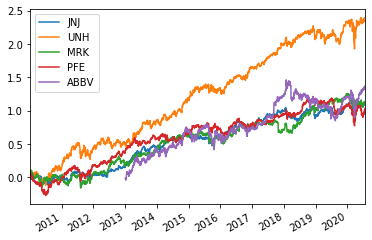

ABT (0.9949901226792496, 9) (0.9815917233792711, 9) (0.12471156801201344, 9) (0.20847662345852336, 9)
TMO (0.9995320488818873, 17) (0.9796354675816985, 17) (0.24962791223472341, 17) (0.4235255986192605, 17)
BMY (0.8830416820724609, 0) (0.5418821739769167, 1) (0.5865325636004162, 0) (0.07521954462626232, 0)
AMGN (0.9786249667251548, 9) (0.8815687815965167, 9) (0.3224098775184845, 9) (0.08536195534860375, 9)
LLY (0.9997439547054399, 13) (0.9821729220410098, 13) (0.1355957065782511, 13) (0.29840502070084407, 13)


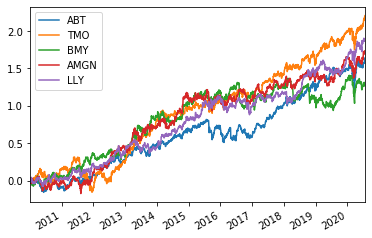

In [9]:
HLT10=['JNJ','UNH','MRK','PFE','ABBV','ABT','TMO','BMY','AMGN','LLY']
LongtermInvest(HLT10,ror,'2010/1/4')

チャートから分かるように、IBBを構成する銘柄の株価の上下動は激しく、XLVは比較的安定しています。

### 数値化(時系列の性質、要約統計量)

株価のデータのように時間の経過にしたがって測定されたデータを時系列データといいます。その性質を統計的に表現する方法はいろいろあるのですが、その1つとして、それぞれの価格がランダムであるかどうかを判断するための指標があります。価格がランダムに動いているのであれば、将来の株価がどのように推移するのか予測不可能となってしまいます。価格がランダムに動くときそれはランダムウォークにしたがうといいます。価格がランダムに動く限りにおいては、将来の株価の予測は不可能です。ですから株式の長期投資には不可欠な指標です。このよう時系列の評価の仕方として[ディッキーフラー検定](https://qiita.com/innovation1005/items/6a1a67086be429566f27)があります。statmodelsではadfullerという関数で計算ができます。これは4つのタイプがあります。

- ドリフト無し('nc')：確定的トレンド無しランダムウォーク 
- ドリフト付き('c')：確定的トレンド付きランダムウォーク 
- ドリフト付き＋トレンド付き('ct')：バブルのような加速度的確定的トレンド付きランダムウォーク 
- ドリフト付き＋加速トレンド付き('ctt')：バブルのような強い加速度的確定的トレンド付きランダムウォーク 

少しややこしいのは結果が１に近い数値であるとランダムウォークであるかどうかが判断できなくなります。また、0に近づくに従いランダムウォークであることは否定されます。したがって、投資家にとってはこの値は小さいほうが良いとなります。みてみましょう。カッコ内の数値は左から、確定的トレンド無し、確定的トレンド付き、加速度的確定的トレンド、強い加速度的確定的トレンドのp値です。

*** 結果

ランダムウォークであるかどうかは期間に大きく影響を受けます。短いほうがランダムウォークが否定される頻度は多くなります。ヘルス株の方が期間がないにもかかわらず、ランダムウォークを否定する場合が多いことが分かります。基準は１０％以下としていますが、これを若干増やすとヘルス株ではすべての銘柄においてランダムウォークは否定されます。

### 世界の製薬会社トップ10


RHHBY (0.9845455156153533, 1) (0.5211427031137295, 1) (0.175950294179193, 1) (0.5103416207150179, 1)
PFE (0.9882791239508663, 4) (0.35635294674902485, 4) (0.8593893710388465, 4) (0.8545535472939041, 4)
NVS (0.9613072696981929, 18) (0.7742019444160211, 18) (0.13860206092333588, 18) (0.10802761924204551, 18)
MRK (0.9894537555707468, 17) (0.3535998221319422, 17) (0.8092586421810426, 17) (0.9376757558694141, 17)
GSK (0.9934749116050555, 10) (0.003220269921678563, 10) (0.44848316507692076, 10) (0.7209672322840468, 10)


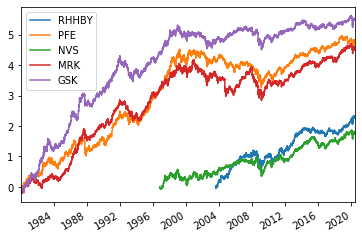

JNJ (0.9999998026946911, 3) (3.892296770108444e-10, 4) (0.000196025265630754, 4) (0.08423122441212133, 4)
SNY (0.7314820219893579, 5) (0.5533123551770914, 5) (0.17921886011768445, 5) (0.32640100388755294, 5)
ABBV (0.9186750668772401, 8) (0.40972092376518143, 8) (0.09928518728809665, 0) (0.2397648466951635, 0)
TAK (0.19705630202939378, 4) (0.026944312858476444, 4) (0.09496319726698732, 4) (0.027904390669750766, 4)
BMY (0.9923178507960491, 7) (0.31334661089053306, 7) (0.49897610731943615, 7) (0.8512865468943058, 7)


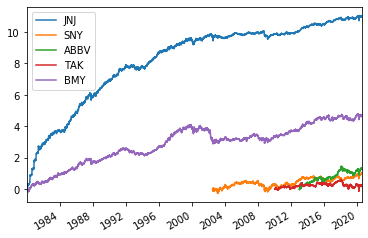

In [10]:
TOP10=['RHHBY','PFE','NVS','MRK','GSK','JNJ','SNY','ABBV','TAK','BMY']
LongtermInvest(TOP10,ror,'1980/1/4')

RHHBY (0.9771575638728306, 15) (0.8078822244650443, 15) (0.5325197431108429, 15) (0.7369606249219707, 15)
PFE (0.4322857854210052, 27) (0.8847124306281118, 27) (0.24933894529073458, 27) (0.761458326373142, 27)
NVS (0.9242886715163999, 14) (0.897339523511286, 14) (0.42766472135019007, 14) (0.6203204412467256, 14)
MRK (0.7000191682517451, 28) (0.916743865877888, 28) (0.2009723200601875, 28) (0.39107141842382953, 28)
GSK (0.4805746774900143, 8) (0.4098756385292752, 8) (0.2011105178336885, 8) (0.3343923503904136, 8)


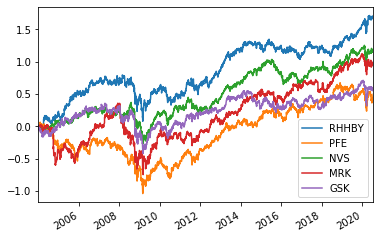

JNJ (0.9774354576117039, 21) (0.9527933938172417, 21) (0.6272384161884751, 21) (0.43441233153680003, 21)
SNY (0.5751332475968003, 12) (0.6729232682859804, 12) (0.3166268415442232, 12) (0.4123986927178384, 12)
ABBV (0.9186750668772401, 8) (0.40972092376518143, 8) (0.09928518728809665, 0) (0.2397648466951635, 0)
TAK (0.19705630202939378, 4) (0.026944312858476444, 4) (0.09496319726698732, 4) (0.027904390669750766, 4)
BMY (0.8621692476897871, 1) (0.9069753340433112, 1) (0.16933962384622253, 1) (0.47228258503969633, 1)


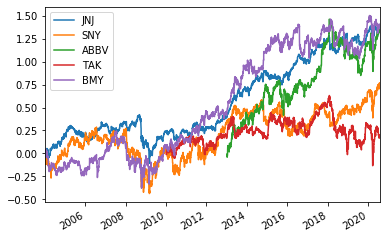

In [11]:
TOP10=['RHHBY','PFE','NVS','MRK','GSK','JNJ','SNY','ABBV','TAK','BMY']
LongtermInvest(TOP10,ror,'2004/1/4')

RHHBY (0.9704033222362021, 8) (0.8909515339071202, 8) (0.8049385818164756, 8) (0.9313157019655286, 8)
PFE (0.9126509267016597, 25) (0.6033626654103216, 25) (0.5417081042986942, 25) (0.0333681603755387, 25)
NVS (0.9192641552371352, 8) (0.7017783971368551, 8) (0.4918771427433114, 8) (0.6436338633207839, 8)
MRK (0.9485106254743152, 16) (0.8840673101622796, 16) (0.07067753620557107, 16) (0.1322142809234218, 16)
GSK (0.672887193058698, 14) (0.4277046564482532, 14) (0.2510289833540755, 14) (0.4236306145578711, 14)


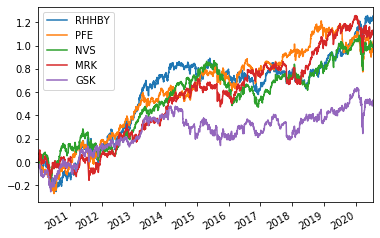

JNJ (0.9715356371961137, 16) (0.8757061536007185, 16) (0.11467059189605189, 16) (0.05430124037044614, 16)
SNY (0.6380273870824631, 1) (0.6489655395036634, 1) (0.27918865871865023, 1) (0.4400379768786238, 1)
ABBV (0.9186750668772401, 8) (0.40972092376518143, 8) (0.09928518728809665, 0) (0.2397648466951635, 0)
TAK (0.19705630202939378, 4) (0.026944312858476444, 4) (0.09496319726698732, 4) (0.027904390669750766, 4)
BMY (0.8830416820724609, 0) (0.5418821739769167, 1) (0.5865325636004162, 0) (0.07521954462626232, 0)


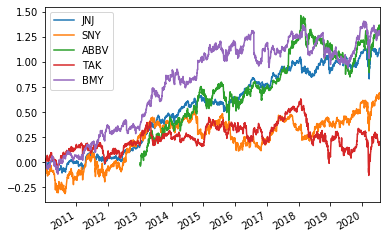

In [12]:
TOP10=['RHHBY','PFE','NVS','MRK','GSK','JNJ','SNY','ABBV','TAK','BMY']
LongtermInvest(TOP10,ror,'2010/1/4')

各銘柄の株価がランダムウォークにしたがうことを否定するためにｐ値の基準を0.1から0.2に広げるとこの長い期間においても6銘柄がランダムウォークにはしたがいません。



# 新型コロナウイルスによるバイオ・ヘルス株への影響
新型コロナウイルスによるバイオ・ヘルス株への影響はその企業が治療薬を開発するか保持しているか、ワクチンの開発をしているかどうかに関連しています。
参考：[新型コロナウイルス 治療薬・ワクチンの開発動向まとめ【COVID-19】](https://answers.ten-navi.com/pharmanews/17853/)

## 治療薬の開発でコロナウイルスと関連する企業とパートナー
今のところコロナウイルスに有効な治療薬として認定されたのはレムデシビルだけです。しかしその効用は限定的です。

2020年4月21日、米国FDAは緊急で「新型コロナウィルス治療促進プログラム(CTAP:the Coronavirus Treatment Acceleration Program)」を、新型肺炎コロナウィルスの治療法の有効性を素早く見極めるために、設置しました。

詳しくは['新型コロナウイルス感染：簡単なモデルでソーシャルディスタンシング(社会的距離戦略)の役割を理解する'の期待される治療法の開発](https://qiita.com/innovation1005/items/dde6e76763e733d01d62)を参照してください。

|コード|銘柄|開発|パートナー
|:-:|:-:|:-:|:-:|
|AMGN|Amgen Inc. |抗体治療、乾癬治療薬|ADPT
|ADPT|Adaptive Biotechnologies Corporation |抗体治療|AMGN
|CYDY|CytoDyn Inc. |治療薬(leronlimab)
|GILD|Gilead Sciences, Inc|治療薬(remdesivir)
|MRK|Merck&Co.,Inc|治療薬(イベルメクチン)|北里大学の大村智特別栄誉教授が開発
||| EIDD-2801|Ridgeback Biotherapeutics |
|RHHBY|Roche Holding AG|治療薬|中外製薬(ロッシェグループ傘下)
|VIR|Vir Biotechnology Inc.|治療薬(Monoclonal antibodies)|Wuxi Biologics(china),GSK(出資),ALNY
|ALNY|Alnylam Pharmaceuticals, Inc.|治療薬|Vir

参考：[Catching Up to Coronavirus: Top 60 Treatments in Development](https://www.genengnews.com/virology/coronavirus/catching-up-to-coronavirus-top-60-treatments-in-development/)

amgn (0.900707272205406, 9) (0.8307381744405216, 9) (0.2837232603685536, 9) (0.2291283774298728, 9)
adpt (0.5029365448014729, 0) (0.31374249672666066, 0) (0.6473788702874538, 0) (0.33665718956696994, 0)
cydy (0.9994608407470569, 16) (0.9990103194883458, 16) (1.0, 16) (0.9968954202413488, 16)
gild (0.6814640719076935, 10) (0.37942473272412963, 10) (0.6515858265504716, 10) (0.1741089535582903, 10)
mrk (0.8806266635346787, 10) (0.55034727928609, 10) (0.7994745039024138, 10) (0.00306053703023135, 9)


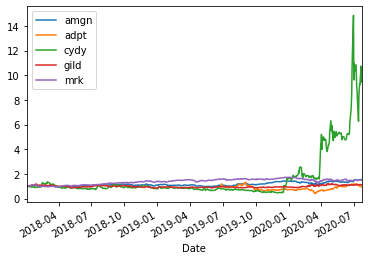

rhhby (0.994047861135613, 8) (0.9904336105237571, 8) (0.20869340233512917, 8) (0.000963236042010642, 19)
vir (0.7133001197474391, 0) (0.5354801194282773, 0) (0.042945207587824066, 0) (0.12220928935501829, 0)
alny (0.6850704755392165, 1) (0.6320572485598289, 1) (0.7365420746885801, 1) (0.0017836019206793007, 4)


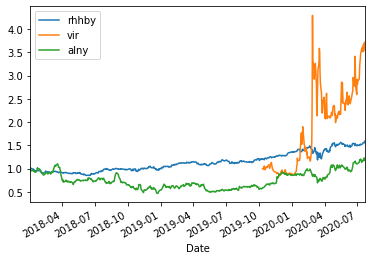

In [13]:
TREAT=["amgn","adpt","cydy","gild","mrk","rhhby","vir","alny"]
def ShorttermInvest(PORT,start='2010/1/4'):
    i=1
    for asset in PORT:
        tsd = web.DataReader(asset,"yahoo",start).dropna()#jpy
        ts=tsd.loc[:,'Adj Close']/tsd.iloc[0,5]
        ts.plot(label=str(asset))
        print(asset,adfuller((ts),regression='nc')[1:3],
          adfuller((ts),regression='c')[1:3],
          adfuller((ts),regression='ct')[1:3],
          adfuller((ts),regression='ctt')[1:3])
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()        
ShorttermInvest(TREAT,'2018/1/4')

amgn (0.900707272205406, 9) (0.8307381744405216, 9) (0.2837232603685536, 9) (0.2291283774298728, 9)
adpt (0.5029365448014729, 0) (0.31374249672666066, 0) (0.6473788702874538, 0) (0.33665718956696994, 0)
cydy (0.9994608407470569, 16) (0.9990103194883458, 16) (1.0, 16) (0.9968954202413488, 16)
gild (0.6814640719076935, 10) (0.37942473272412963, 10) (0.6515858265504716, 10) (0.1741089535582903, 10)
mrk (0.8806266635346787, 10) (0.55034727928609, 10) (0.7994745039024138, 10) (0.00306053703023135, 9)


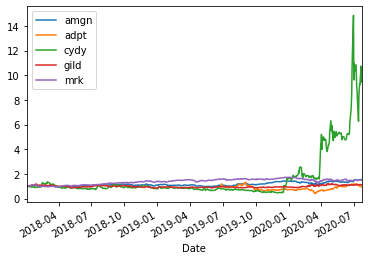

rhhby (0.994047861135613, 8) (0.9904336105237571, 8) (0.20869340233512917, 8) (0.000963236042010642, 19)
vir (0.7133001197474391, 0) (0.5354801194282773, 0) (0.042945207587824066, 0) (0.12220928935501829, 0)
alny (0.6850704755392165, 1) (0.6320572485598289, 1) (0.7365420746885801, 1) (0.0017836019206793007, 4)


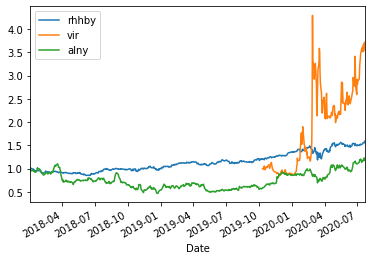

In [14]:
TREAT=["amgn","adpt","cydy","gild","mrk","rhhby","vir","alny"]
def ShorttermInvest(PORT,start='2020/1/4'):
    i=1
    for asset in PORT:
        tsd = web.DataReader(asset,"yahoo",start).dropna()#jpy
        ts=tsd.loc[:,'Adj Close']/tsd.iloc[0,5]
        ts.plot(label=str(asset))
        print(asset,adfuller((ts),regression='nc')[1:3],
          adfuller((ts),regression='c')[1:3],
          adfuller((ts),regression='ct')[1:3],
          adfuller((ts),regression='ctt')[1:3])
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()        
ShorttermInvest(TREAT,'2018/1/4')

確定的トレンドがありそうなものは4銘柄です。結果は期間により変わってきます。上昇の始まる時期は銘柄によりまちまちです。

## ワクチン開発でコロナウイルスと関連する企業とパートナー
2020年5月15日に「Operation Warp Speed」を発表し、現在5－7社に絞られている。米国政府はすでにModerna, Johnson & Johnson と AstraZenecaに巨額の資金を提供し,さらにSanofi と GlaxoSmithKlineにも規模は小さいものの資金提供している。2020/6/26に[Vaxartへの資金提供が決まり](https://investors.vaxart.com/investor-relations)、株価は急騰した。

|コード|銘柄|開発|パートナー
|:-:|:-:|:-:|:-:|
|ALT|Altimmune, Inc.|タンパク質ベースワクチン
|BNTX|BioNTech SE |mRNAワクチン|PFE, Shanghai Fosun Pharm
|HTBX|Heat Biologics, Inc.|mRNAワクチン|サノフィ
|INO|Inovio Pharmaceuticals, Inc.|DNAワクチン|Bill&Melinda Gates Foundation
|JNJ|Johnson & Johnson|ワクチン(アデノウイルス)|china
|MRNA|Moderna, Inc. |RNAワクチン
|NVAX|Novavax, Inc. |組み換えワクチン|EBS(ワクチン製造)
|AZN|AstnaZeneka|ワクチン(アデノウイルス)|オックスフォード大学
|TBIO|Translate Bio, Inc. |ワクチン|サノフィ
|VXRT|Vaxart|ワクチン|Attwill,ヘッジファンド|

ワクチン開発については「[新型コロナウイルス感染：簡単なモデルでソーシャルディスタンシング(社会的距離戦略)の役割を理解する](https://qiita.com/innovation1005/items/dde6e76763e733d01d62)の「ワクチンについて」を参考にしてください。

alt (0.004018056136408922, 10) (0.027183489539808897, 10) (0.8509876426943563, 5) (0.4505922321611244, 5)
bntx (0.9674570646891069, 2) (0.96025209043707, 2) (0.5090731454624302, 2) (0.7021081331849284, 2)
htbx (0.05015408006118395, 6) (0.032114200251857905, 6) (0.8673086976280016, 6) (0.6844682921491936, 6)
ino (0.9999809182384263, 17) (1.0, 17) (1.0, 18) (1.0, 18)
jnj (0.7206932927453655, 10) (0.12146385388072234, 9) (0.0012791251070145234, 9) (0.005853049454614576, 9)


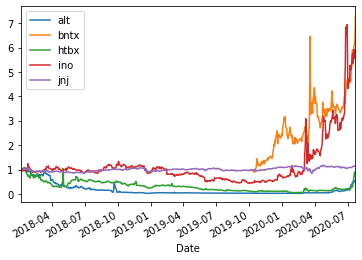

mrna (0.9975145437643976, 6) (0.9986472087056456, 9) (0.9967965976815989, 9) (0.7467465520324347, 6)
nvax (0.9947870391922764, 8) (0.9988221979052365, 8) (1.0, 11) (1.0, 11)
azn (0.966741007840618, 9) (0.931265880227044, 9) (0.15496819466234896, 9) (0.005092854147160957, 17)
tbio (0.7959335249128694, 14) (0.8418300682826647, 15) (0.8352017616409176, 14) (0.8111022940886676, 14)
vxrt (0.8688445674078862, 15) (0.9672314702983051, 15) (1.0, 15) (1.0, 15)


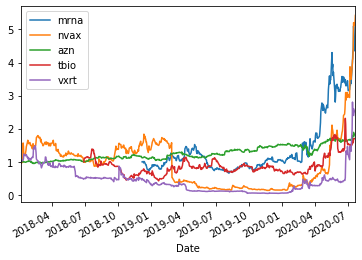

In [15]:
VACC=["alt","bntx","htbx","ino","jnj","mrna","nvax","azn","tbio","vxrt"]
ShorttermInvest(VACC,'2018/1/4')

alt (0.9941824219528428, 12) (0.9984304548921378, 12) (0.996466701791754, 12) (0.8831835539775545, 11)
bntx (0.9284519646172733, 2) (0.9654258245838263, 2) (0.658620361655698, 2) (0.6505971249228165, 2)
htbx (0.9385874734758284, 5) (0.9835196587189432, 5) (0.8252430782277469, 5) (0.8594431592244287, 5)
ino (0.864455664601079, 0) (0.8595925367804194, 0) (0.06772454601028652, 1) (0.007597423696608712, 2)
jnj (0.6856144394436144, 9) (0.058177504931763914, 9) (0.17594427816903502, 9) (0.2871416782306555, 9)


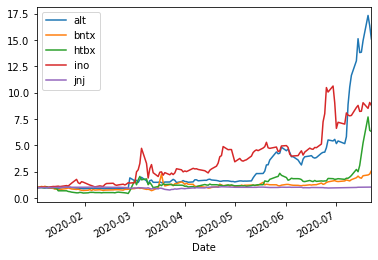

mrna (0.9535304524896407, 0) (0.925371110474649, 0) (0.16609853845136452, 0) (0.3072734272289239, 0)
nvax (0.999999874906104, 11) (1.0, 11) (1.0, 11) (0.9833015902012696, 6)
azn (0.8580955511213337, 1) (0.7578814533903764, 2) (0.5966191371011365, 2) (0.7600662012438663, 2)
tbio (0.8247985628039413, 2) (0.7186076416274217, 2) (0.07413079336998578, 2) (0.17435772636705, 2)
vxrt (0.9130056966976714, 14) (0.9786785057486168, 14) (0.8501573577176504, 14) (0.9647571869816662, 14)


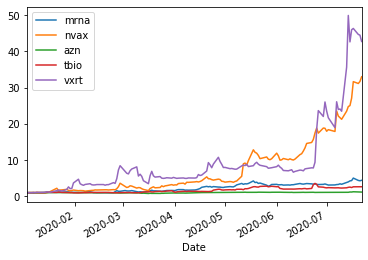

In [16]:
VACC=["alt","bntx","htbx","ino","jnj","mrna","nvax","azn","tbio","vxrt"]
ShorttermInvest(VACC,'2020/1/4')

alt (0.6136410775756019, 7) (0.4456968530556685, 7) (1.0, 7) (0.9990336481410589, 7)
bntx (0.9788325019219961, 6) (0.8567418550199829, 6) (0.009332377460412227, 1) (0.04678391021153459, 1)
htbx (0.6816246220169356, 6) (0.6236483993872786, 6) (0.733743416995517, 6) (0.9793120702692281, 6)
ino (0.4370211589440096, 6) (0.04639243326206158, 6) (0.4498199469908401, 6) (0.344716631923656, 6)
jnj (0.975064386132218, 20) (0.9268414354924039, 20) (0.5871489604140306, 20) (0.1890905844629282, 20)


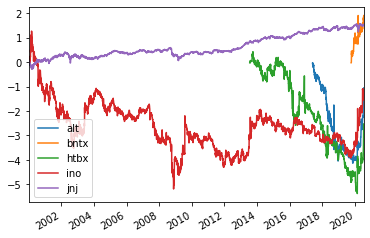

mrna (0.9719909318403522, 9) (0.9936159697521287, 9) (0.9878244819408282, 9) (0.5735482640156304, 9)
nvax (0.05356294029852214, 3) (0.13457280495264173, 3) (0.32584920868332545, 3) (0.5432836176518698, 3)
azn (0.9900363523553377, 15) (0.975378100851606, 15) (0.5063269409968976, 15) (0.07853709548780362, 15)
tbio (0.09376028747486531, 0) (0.47386224083942374, 0) (0.4134214912467901, 0) (0.4135096541022658, 0)
vxrt (0.5821050663662162, 4) (0.7957964181837687, 4) (0.37847942722147965, 4) (0.9205512269885807, 4)


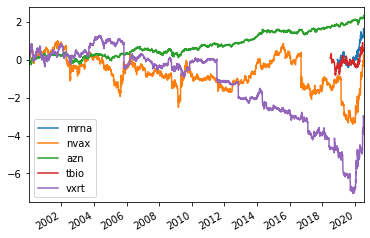

In [17]:
VACC=["alt","bntx","htbx","ino","jnj","mrna","nvax","azn","tbio","vxrt"]
LongtermInvest(VACC,ror,'2000/1/4')

確定的トレンドがありそうなものは6銘柄です。こちらも期間によって変わります。すでに2019年12月から多くは上昇し始めています。これが治療薬で注目されている銘柄と異なるところです。


# 世界のトップ１０ワクチン製造者
ワクチンの開発には膨大な費用と時間がかかります。そのリスクに耐えることのできる製薬メイカーはファイザー、メルク、グラクソ・スミスクライン、サノフィの4社だけです。

||コード|製薬会社|国籍|
|:-:|:-:|:-:|:-:|
|1.|GSK|グラクソ・スミスクライン株式会社|英国|
|2.|MRK|メルク|米国|
|3.|SNY|サノフィ|フランス|
|4.|PFE|ファイザー|米国|
|5.|NVAX|ノババックス|米国|
|6.|EBS|エマージェントバイオソリューソンズ|米国|
|7.|CSLLI|CSL Limited|オーストラリア|
|8.|INO|イノビオファーマシューティカルズ|米国|
|9.||バーバリアンノルディック|ノルウェー|
|10.|TAK|田辺三菱製薬|日本|

GSK (0.9934749116050555, 10) (0.003220269921678563, 10) (0.44848316507692076, 10) (0.7209672322840468, 10)
MRK (0.9905373568779867, 21) (0.3155134617441836, 17) (0.8520109207317754, 17) (0.9438258924056684, 17)
SNY (0.7314820219893579, 5) (0.5533123551770914, 5) (0.17921886011768445, 5) (0.32640100388755294, 5)
PFE (0.9999869390165939, 3) (0.007607109377203495, 3) (0.9899052176525526, 4) (0.9415828965429045, 4)
NVAX (0.018876466132818008, 3) (0.07960093302448312, 3) (0.1690086885379819, 3) (0.40670961758338336, 3)


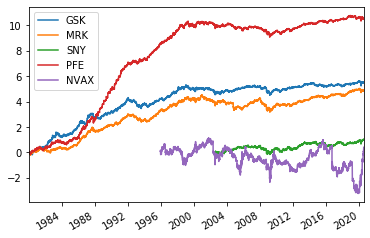

EBS (0.7697492197493554, 3) (0.7565152022848018, 3) (0.024282614394982423, 3) (0.04470858957114253, 3)
INO (0.43631926908202107, 6) (0.1311506993624018, 6) (0.6949197487132773, 6) (0.3643421985900185, 6)
TAK (0.19705630202939378, 4) (0.026944312858476444, 4) (0.09496319726698732, 4) (0.027904390669750766, 4)


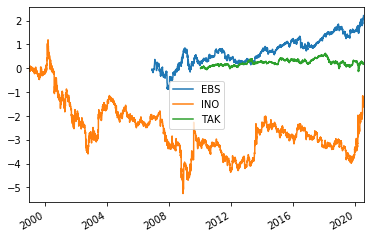

In [18]:
VAC10=['GSK','MRK','SNY','PFE','NVAX','EBS','INO','TAK']
LongtermInvest(VAC10,ror,'1980/1/4')

GSK (0.672887193058698, 14) (0.4277046564482532, 14) (0.2510289833540755, 14) (0.4236306145578711, 14)
MRK (0.9485106254743152, 16) (0.8840673101622796, 16) (0.07067753620557107, 16) (0.1322142809234218, 16)
SNY (0.6380273870824631, 1) (0.6489655395036634, 1) (0.27918865871865023, 1) (0.4400379768786238, 1)
PFE (0.9126598932334604, 25) (0.6033603485946003, 25) (0.5417642884011836, 25) (0.03338025718233877, 25)
NVAX (0.12424121899939217, 3) (0.5518288166984349, 3) (0.8960486637480637, 3) (0.9972671426957025, 3)


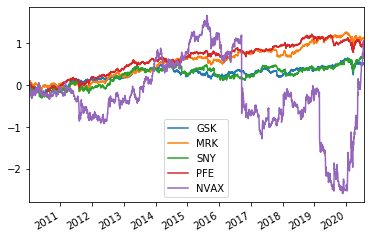

EBS (0.9737071915859928, 21) (0.9580722290122731, 21) (0.6872916594198978, 21) (0.5345616138694445, 21)
INO (0.3931993760712129, 5) (0.7727170368853669, 5) (0.8642738797180226, 5) (0.9821323896146227, 5)
TAK (0.19705630202939378, 4) (0.026944312858476444, 4) (0.09496319726698732, 4) (0.027904390669750766, 4)


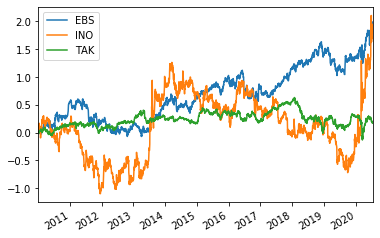

In [19]:
VAC10=['GSK','MRK','SNY','PFE','NVAX','EBS','INO','TAK']
LongtermInvest(VAC10,ror,'2010/1/4')